In [3]:
import os
import cv2

In [3]:
features=[]
target=[]
for x in ['without_mask', 'with_mask']:
    ImagesNamesList= os.listdir("D:/Datasets/mask" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread("D:/Datasets/mask" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
            features.append(Imgarr)
        except:
            pass
        else:
            if x=="without_mask":
                target.append(0)
            else:
                target.append(1)
        
        
        
            
    print("In Folder", x)

In Folder without_mask
In Folder with_mask


In [5]:
import numpy as np

In [6]:
features=np.array(features)

In [7]:
target=np.array(target)

In [8]:
features.shape

(3810, 100, 100, 3)

In [9]:
target.shape

(3810,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [12]:
features_train.shape

(3048, 100, 100, 3)

In [13]:
target_train.shape

(3048,)

In [14]:
features_test.shape

(762, 100, 100, 3)

In [15]:
target_test.shape

(762,)

In [16]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [17]:
features_train=np.array(list(map(preprocessing,features_train)))

In [18]:
features_train=features_train.reshape(3048, 100, 100,1)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [22]:
dataGen.fit(features_train)

In [23]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [24]:
images,labels=next(batches)

In [25]:
import matplotlib.pyplot as plt

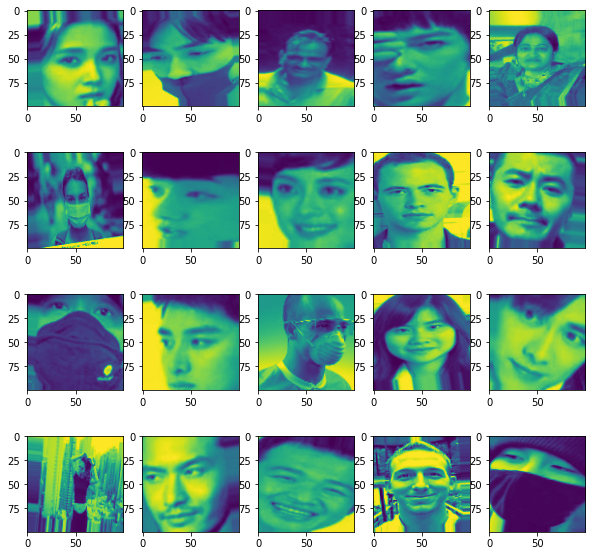

In [26]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()
    

In [27]:
from keras.utils import to_categorical

In [28]:
target_train=to_categorical(target_train)

In [29]:
target_train.shape

(3048, 2)

# Step 1:

In [32]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [38]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

# Step 2:

In [39]:
#from tensorflow.keras.optimizers import Adam

In [40]:
#model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

C:\Users\ANUSHKA\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# # Step 3:

In [41]:
#model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

C:\Users\ANUSHKA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
153/153 [==============================] - 68s 438ms/step - loss: 0.6397 - accuracy: 0.6198
Epoch 2/20
153/153 [==============================] - 73s 477ms/step - loss: 0.4895 - accuracy: 0.7612
Epoch 3/20
153/153 [==============================] - 72s 473ms/step - loss: 0.4229 - accuracy: 0.8100
Epoch 4/20
153/153 [==============================] - 72s 470ms/step - loss: 0.3404 - accuracy: 0.8556
Epoch 5/20
153/153 [==============================] - 75s 488ms/step - loss: 0.3217 - accuracy: 0.8635
Epoch 6/20
153/153 [==============================] - 74s 481ms/step - loss: 0.2738 - accuracy: 0.8858
Epoch 7/20
153/153 [==============================] - 72s 470ms/step - loss: 0.2484 - accuracy: 0.8950
Epoch 8/20
153/153 [==============================] - 74s 485ms/step - loss: 0.2461 - accuracy: 0.9068
Epoch 9/20
153/153 [==============================] - 74s 482ms/step - loss: 0.2478 - accuracy: 0.8983
Epoch 10/20
153/153 [==============================] - 75s 488ms/step - l

In [11]:
import cv2
import numpy as np

In [3]:
from tensorflow.keras.models import model_from_json

In [4]:
#model_json=model.to_json()
#with open("AI_Mask.json",'w') as abc:
 #   abc.write(model_json)
 #   abc.close()
#model.save_weights("AI_MaskWeights.h5")
#print("saved the model")

In [5]:
json_file= open("C:\\Users\\ANUSHKA\\anaconda3\\anushka\\AI_Mask.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("C:\\Users\\ANUSHKA\\anaconda3\\anushka\\AI_Mask.h5")
print("loaded model successfully")

loaded model successfully


In [6]:
def getClassName(classno):
    if classno==0:return 'with mask'
    elif classno==1: return 'without mask'

In [9]:
capt= cv2.VideoCapture(0)
capt.set(3,640)#Width
capt.set(4,480)#Height
capt.set(10,150)#Brightness

True

In [10]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    imagearr=cv2.resize(imagearr,(32,32))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape(1,32,32,1)
    predictions=loaded_model.predict(imagearr)
    classIndex=loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class:",(20,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255,2))
    cv2.putText(image,"PROBABILITY:",(20,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255,2))

NameError: name 'np' is not defined